In [203]:
import pandas as pd
import pylab as pl
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
grb050525A = pd.read_csv("grb050525A.dat", sep=" ", header=None)

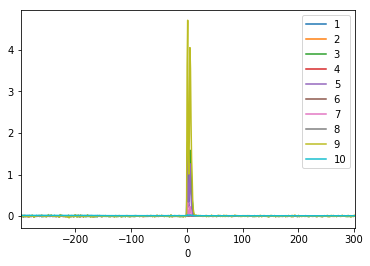

In [9]:
grb050525A.plot(x=0)

In [10]:
grb050525A.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-298.556,0.005023,0.008178,-0.001165,0.008340,0.009040,0.008142,0.013983,0.008230,0.026882,0.016446
1,-297.556,-0.005947,0.008011,0.008888,0.008477,0.014794,0.008025,0.010334,0.008280,0.028069,0.016401
2,-296.556,-0.005508,0.007847,0.001759,0.008327,-0.004056,0.007848,0.000811,0.008458,-0.006994,0.016249
3,-295.556,-0.001119,0.008253,-0.006670,0.008211,0.004374,0.008147,-0.010784,0.008375,-0.014198,0.016494
4,-294.556,0.006988,0.007975,-0.004426,0.008203,0.008548,0.007683,0.009081,0.008370,0.020191,0.016124


In [90]:
grb050525A = pd.read_csv("grb050525A_all.dat", sep=" ", header=None, names=[
    "filter", "time", "exposure", "mag", "magerr", "flux", "fluxerr", "None"], index_col=None)

In [91]:
grb050525A[["time","mag", "filter"]][60:90]

,time,mag,filter
60,215,13.70,U
61,299,14.08,U
62,419,14.47,U
63,890,15.29,U
64,975,15.32,U
65,12019,17.66,U
66,468,14.71,U
67,552,14.97,U
68,637,15.01,U
69,721,15.14,U


In [142]:
def linint(x, mag, earlier, later):
    x0 = earlier.logtime.values[-1]
    x1 = later.logtime.values[0]
    y0 = earlier.mag.values[-1]
    y1 = later.mag.values[0]
    y = y0 + (x - x0) * (y1 - y0) / (x1 - x0) 
    magdiff = (y - mag)
    return magdiff

In [208]:
mpl.colors.to_rgba("r", alpha=1)
grb050525A["rgbcolor"] = grb050525A["color"].map(lambda x: mpl.colors.to_rgba(x, 0.5))


ValueError: Invalid RGBA argument: 0.0

In [209]:
grb050525A["flux"] = pd.to_numeric(grb050525A["flux"], errors="coerce")
grb050525A["mag"] = pd.to_numeric(grb050525A["mag"], errors="coerce")
grb050525A["newmag"] = grb050525A["mag"]
grb050525A["uplimmag"] = np.nan * len(grb050525A)
grb050525A.loc[grb050525A[grb050525A.mag.isna()].index, "uplimmag"] = \
    grb050525A[grb050525A.mag.isna()].magerr
grb050525A["color"] = grb050525A["filter"].map({"V":"r", "B":"m", "U":"c", "W1":"purple", 
                                                "M2":"b", "W2":"k"})
grb050525A["rgbcolor"] = grb050525A["color"].apply(lambda x: mpl.colors.to_rgba(x, 0.5))
grb050525A["logtime"] = np.log10(grb050525A["time"])
grb050525A["logflux"] = np.log10(grb050525A["flux"])

for c in grb050525A["filter"].unique():
    if c == "V": continue
    t0 = grb050525A[grb050525A["filter"] == c].logtime.values[0] 
    m0 = grb050525A[grb050525A["filter"] == c].mag.values[0]
    later = grb050525A[grb050525A["filter"] == "V"][
        grb050525A[grb050525A["filter"] == "V"].logtime > t0]
    earlier = grb050525A[grb050525A["filter"] == "V"][
        grb050525A[grb050525A["filter"] == "V"].logtime < t0]
    #print (t0, "\n", later, earlier)
    mdiff = linint(t0, m0, earlier, later)
    ind = grb050525A[grb050525A["filter"] == c].index
    grb050525A.loc[ind, "newmag"] += mdiff 
    grb050525A.loc[ind, "uplimmag"] -= mdiff 

#for f in grb050525A["mag"].values

Text(0.5, 0, 'log time')

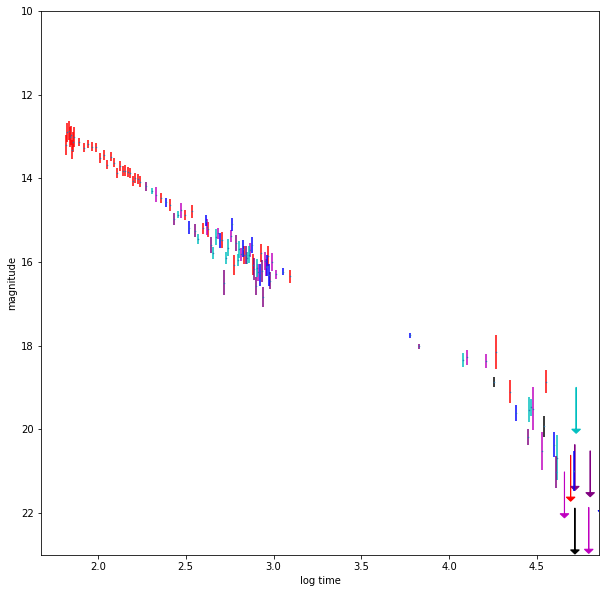

In [220]:
pl.figure(figsize=(10,10))
ind = grb050525A.magerr > 0#(grb050525A["filter"] == "V")+ (grb050525A["filter"]  == "B") + \
      #     (grb050525A["filter"]  == "U")
pl.errorbar(grb050525A["logtime"], grb050525A["newmag"], 
            ms=1, alpha=1,
                         yerr=grb050525A["magerr"], fmt='.',
                        ecolor=grb050525A["color"])
nuplim = grb050525A.mag.isna().sum()
for i in grb050525A[grb050525A.mag.isna()].index:
    pl.arrow(grb050525A.loc[i].logtime, 
         grb050525A.loc[i].uplimmag, 0, 1, fc=grb050525A.loc[i].color,
            head_width=0.05, head_length=0.1, ec=grb050525A.loc[i].color)
pl.ylim(23,10)
pl.ylabel("magnitude")
pl.xlabel("log time")

In [135]:
grb050525A[grb050525A.mag.isna()]


,filter,time,exposure,mag,magerr,flux,fluxerr,None,color,logtime,logflux,newmag
41,V,49320,4982.0,NaN,20.62,NaN,0.2,NaN,r,4.693023,NaN,NaN
42,V,971360,33800.0,NaN,22.09,NaN,0.1,NaN,r,5.987380,NaN,NaN
43,V,1171176,6081.0,NaN,21.16,NaN,0.1,NaN,r,6.068622,NaN,NaN
58,B,45468,896.0,NaN,20.70,NaN,0.3,NaN,m,4.657706,NaN,NaN
59,B,62549,6513.0,NaN,21.55,NaN,0.1,NaN,m,4.796220,NaN,NaN
74,U,52994,780.0,NaN,19.68,NaN,0.4,NaN,c,4.724227,NaN,NaN
75,U,128928,1548.0,NaN,20.05,NaN,0.3,NaN,c,5.110347,NaN,NaN
89,W1,52100,898.0,NaN,21.05,NaN,0.3,NaN,purple,4.716838,NaN,NaN
90,W1,63738,900.0,NaN,21.20,NaN,0.3,NaN,purple,4.804398,NaN,NaN
105,M2,74798,931.0,NaN,21.59,NaN,0.6,NaN,b,4.873890,NaN,NaN
